# Neural Networks


---


Link to the dataset: https://drive.google.com/file/d/1G12DoncT43hYmA72ZyY2xhyukrhnDTBn/view?usp=sharing

---



General Instructions:

---


1. You have to do this lab individually
2. You may use **sklearn, seaborn, matplotlib, pandas, Tensorflow 2.x**
3. All the code should be submitted in the form of a single Jupyter notebook itself.

In [ ]:
# Import the necessary libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import random

# If using Google Colab, use the following package to display the image
# If running on your local system, cv2.imshow shall work fine
# If running on your local system please comment the line below
from google.colab.patches import cv2_imshow

In [ ]:
IMG_HEIGHT = 40
IMG_WIDTH = 40

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset

The dataset used here is a synthetic alphabet recognition dataset. It consists of images of lowercase English alphabets, generated with handwritten-fonts. All images are single channel (grayscale) and have size 40 * 40. <br>

The dataset has the following directory structure:

<pre>
<b>CR-Dataset</b>
|__ <b>train</b>
    |______ <b>a</b>: [a_1.png, a_2.png, a_3.png ....]
    |______ <b>b</b>: [b_1.png, b_2.png, b_3.png ....]
        .
        .
        .
    |______ <b>y</b>: [y_1.png, y_2.png, y_3.png ....]    
    |______ <b>z</b>: [z_1.png, z_2.png, z_3.png ....]   
    
|__ <b>validation</b>
    |______ <b>a</b>: [a_221.png, a_322.png, a_353.png ....]
    |______ <b>b</b>: [b_241.png, b_352.png, b_363.png ....]
        .
        .
        .
    |______ <b>y</b>: [y_221.png, y_322.png, y_353.png ....]
    |______ <b>z</b>: [z_241.png, z_352.png, z_363.png ....]
    
|__ <b>test</b>: [a_521.png, b_272.png, g_433.png ....]
</pre>
*Note:* The file names are for representation only, they may differ in the original dataset.<br>


Extract the paths of these directories onto different variables to facilitate accessing the dataset and thereby training the model.

In [ ]:
#Add the paths for train, validation and test directories
import zipfile

zip_file_link = zipfile.ZipFile("/content/drive/MyDrive/CR-Dataset.zip","r")
zip_file_link.extractall("/tmpB")

train_dir_path="/tmpB/CR-Dataset/Train"
validation_dir_path="/tmpB/CR-Dataset/Validation"
test_dir_path="/tmpB/CR-Dataset/Test"

# Generate Image Batches


---


Fitting the model on entire training set may be memory and computation inefficient. Hence we generate batches of images to be processed by the model. `ImageDataGenerator` class in tensorflow facilitates this. 

Describe the various arguments in the instantiation of `tensorflow.keras.preprocessing.image.ImageDataGenerator` object.


---

**3 Points**

---
**`tensorflow.keras.preprocessing.image.ImageDataGenerator`**has some important arguments which can be used according to our convenience and better data training.

**1. featurewise_center -** It standardises the dataset feature-wise i.e. mean = 0. It takes boolean value.

**2. samplewise_center -** It also takes boolean input. When set true, it sets mean to 0 for each sample.

**3. featurewise_std_normalization -** It is also boolean type. It normalizes the dataset featurewise i.e. divides input by standard deviation.

**4. samplewise_std_normalization -** Boolean type. It divides each input by standard deviation.

**5 zca_whitening -** Boolean type. It transforms covariance into  identity matrix. It is used to reduce the correaltion between faetures.

**6. zca_epsilon -** Float type. Epsilon for zca whitening. It is used to deal with 0 values while zca whitening. its default value is 1e-6.

**7. rotation_range -** It is used to rotate images in a given range. the range can vary between 0 to 180 deg. We rotate the images to make the model more robust.

**8. width_shift_range -** It is used to shift the image horizontally and randomly between width range of image. We train the model with shifted images for better exposure of different frames and make the model more robust.

**9. height_shift_range -** It shifts the image vertically and randomly between height range of image. It is also used to fit differnt frames of images for more accurate model.

**10. brightness_range -** Type tuple of list of 2 floats. It shifts the brightness of the image from the given range of values.

**11. shear_range -** Type float. It controls the shear angle (in anti-clock direction in degrees).

**12. zoom_range -** Type float. It zooms the image randomly between given range of values.

**13. channel_shift_range -** Type float. Range for random channel shifts.

**14. fill_mode -** It fills the points outside the given boundaries. Points are filled according to give mode:
- 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
- 'nearest': aaaaaaaa|abcd|dddddddd
- 'reflect': abcddcba|abcd|dcbaabcd
- 'wrap': abcdabcd|abcd|abcdabcd

**15. cval -** Type float or int. When ***fill_mode = "constant"***, this value is used for points outside the boundaries.

**16. horizontal_flip -** Type boolean. It randomly flips inputs horizontally.

**17. vertical_flip -** Type boolean. It randomly flips the inputs vertically.

**18. rescale -** The data is multiplied by given value if it is not 'None' or 0.

**19. preprocessing_function -** It is the function applied to every input. It takes image(as numpy tensor) as argument and outputs tensor of same shape after resizing or augmenting.

**20. validation_split -** Type float. It is fraction of images which is reserved for validation (strictly between 0 and 1).




Describe the arguments of `flow_from_directory()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object. 

---

**3 Points**

---
**The `flow_from_directory()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object takes the path to a directory and generates different batches of augmented data. Some of its important arguments are :-**

**1. directory -** Type string. It takes the path to target directory.

**2. target_size -** Type tuple of height and width. It is used to resize the dimensions of all images found in directory. Its default value is (256,256).

**3. color_mode -** It is used to convert images to either greyscale or rgb or rgba. Decides the number of cannels (1,3 or 4) to which image will be converted.

**4. classes -** It is the list class subdirectories. By default it infers the names of subdirectories under the given directory as different classes.

**5. class_mode -** It determines the type of labels associated out of "categorical", "binary", "sparse", "input" or None. Default is categorical.

**6. batch_size -** It determines the size of data batches. Default value is 32.

**7. shuffle -** Whether to shuffle data or not. Default is true.

**8. seed -** Optional random seed for shuffling and transformations.

**9. save_to_dir -** It allows to save the augmented images to a specified directory so that they can be visualized for clarity of work.

**10. save_prefix -** Type string. Prefix used for filenames saved using ***save_to_dir***.

**11. save_format -** Specifies the format of images saved using ***save_to_dir*** in 'jpeg' or 'png'. Default is 'png'.

**12. follow_links -** Whether to follow symlinks inside class subdirectories. Default is false.

**13. subset -** Subset of data ("training" or "validation") if validation_split is set in ImageDataGenerator.

**14. interpolation -** It is used to resample image if the target size is different from that of loaded image.
 

Create a function that returns a generator object which shall fetch batches of images from the specified directory. This function shall be reused for fetching images from train and validation directories.



---

**3 Points**


---




In [ ]:
def get_generator_from_dir(directory_path, batch_size_):
    # Insert your code here
    batch_generator_obj = ImageDataGenerator()
    data_batch_generator = batch_generator_obj.flow_from_directory(directory=directory_path, target_size=(40,40), batch_size=batch_size_, color_mode='grayscale')

    return data_batch_generator

Describe the arguments of `flow_from_dataframe()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object. 

---

**3 Points**

---
**`flow_from_dataframe()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object takes dataframe and the path of directory to generate batches of images. Some of its important argumrnts are :-**

**1. dataframe -** It takes a Pandas dataframe containing filepaths relative to directory of images.

**2. directory -** Type string. Takes the path of image directory.

**3. x_col -** Type string. The column in dataframe containing file names.

**4. y_col -** Type string or list. It is column containing target class.

**5. weight_col -** Type string. The column in dataframe containing sample weights.

**6. color_mode -** It is used to convert images to either grayscale or rgb or rgba. Decides the number of cannels (1,3 or 4) to which image will be converted.

**7. classes -** It is the optional list of classes. When not provided, it takes values from y_col mapped to label indices.

**8. class_mode -** It is the mode for yeilding the targets. Different modes are:
- "binary": 1D numpy array of binary labels.

- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output.

- "input": images identical to input images (mainly used to work with autoencoders).
- "multi_output": list with the values of the different columns.

- "raw": numpy array of values in y_col column(s).

- "sparse": 1D numpy array of integer labels, - None, no targets are returned (the generator will only yield batches of image data, which is useful to use in model.predict()).

**9. batch_size -** It determines the size of data batches. Default value is 32.

**10. shuffle -** Whether to shuffle data or not. Default is true.

**11. seed -** Optional random seed for shuffling and transformations.

**12. save_to_dir -** It allows to save the augmented images to a specified directory so that they can be visualized for clarity of work.

**13. save_prefix -** Type string. Prefix used for filenames saved using ***save_to_dir***.

**14. save_format -** Specifies the format of images saved using ***save_to_dir*** in 'jpeg' or 'png'. Default is 'png'.

**15. subset -** Subset of data ("training" or "validation") if validation_split is set in ImageDataGenerator.

**16. interpolation -** It is used to resample image if the target size is different from that of loaded image.

**17. validate_filenmaes -** Type boolean. It decides whether to validate images filenames in x_col. When set true, invalid images will be ignored.

Create a function that returns a generator object which shall fetch batches of images from the specified directory using a dataframe that has information about images and their labels. This function shall be reused for fetching images from test directory.



---

**3 Points**


---




In [ ]:
def get_generator_from_dataframe(directory_path, dataframe, batch_size_):
    # Insert your code here
    batch_generator_obj = ImageDataGenerator()
    data_batch_generator = batch_generator_obj.flow_from_dataframe(
        directory=directory_path, 
        dataframe=dataframe,
        target_size=(40,40), 
        batch_size=batch_size_, 
        color_mode='grayscale',
        x_col='Images',
        y_col='Label')

    return data_batch_generator

Create a function that returns a dataframe having image file names and their corresponding class labels for a folder. This will help in creating generator from a dataframe.



---

**2 Points**


---




In [ ]:
def get_dataframe(folder_name):
    
    df = pd.DataFrame(columns=['Images', 'Label'])
    # Insert code to give you list of all the image files in folder
    for root, dirs, files in os.walk(folder_name):

    # Insert code to get list of labels from list of images
    # (Hint: every image file name has its label name as prefix)
        labels = [file[0] for file in files]
        # print(labels)
        
    # Make a dataframe with two columns - Image(file name) and Label (class label)
    
        df1 = pd.DataFrame({
            'Images': files,
            'Label': labels
    })

        df = df.append(df1)
    #display and return the dataframe
    print(df)
    return df
# get_dataframe(train_dir_path)
var = get_dataframe(train_dir_path)

         Images Label
0     p_642.png     p
1     p_282.png     p
2     p_581.png     p
3     p_437.png     p
4    p_2818.png     p
..          ...   ...
697   s_200.png     s
698   s_644.png     s
699   s_449.png     s
700  s_3260.png     s
701   s_184.png     s

[20220 rows x 2 columns]


Describe the arguments for the following functions callable on a `tensorflow.keras.Sequential` model object :

1. add() **[3 Points]**

> *It adds a layer instance on top of the layer stack. Alayer is the basic building block of aneural network. Some important layers are :-*
- Core layers
    * Dense layer
    * Input layer
    * Activation layer
- Convolutional layers
    * Conv1D layer
    * Conv2D layer
    * Conv2DTranspose layer
- Pooling layers
    * MaxPooling1D layer
    * MaxPooling2D layer
    * AveragePooling2D layer
    * GlobalMaxPooling2D layer
- Recurrent layer
    * Base RNN layer
    * SimpleRNN layer
- Preprocessing layer
    * Core Preprocessing layer
    * Image Preprocessing & augmentation layer
-Normalization layer
    * LayerNormalization layer
- Regularization layers
    * Dropout layer
    * SpatialDropout2D layer
- Activation layers
    * ReLU layer
    * Softmax layer
    * LeakyReLU layer




2. compile() **[3 Points]**

> - optimizer - It takes name of optimizer as a string. Examples are:
    * Adam
    * SGD
    * RMSprop
    * Adagrad 
    * Adadelta
- loss - It is the string having name of objective function (loss). It returns a weighted loss tensor. Some loss functions are: 
    * Categorical Cross-entropy
    * Mean Absolute error
    * Mean squared error
    * Log loss
    * Kullback-Leibler divergence
- metrics - It is a function used to judge the performance of trained model. Commonly used metrics are:
    * Accuracy
    * mse
- loss_weights - It is the optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
- weighted_metrics - It is the list of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
- steps_per_execution - Type Int. It specifies the number of batches to run during each function call. It can improve performance. 

3. fit() **[3 Points]**

> - x - It takes input data in the form of any of numpy array, tensor, dict or generator.
- y - It takes target data in the form of numpy array or tensors.
- batch_size - Type Int or None. It takes number of samples per gradient descent. Default is 32
- epochs - Type Int. It takes number of ephocs as argument to train the model.
- validation_split - Type float between 0 and 1. We can decide the fraction of training data to be used as validation data.
- validation_data - It is the data used to evaluate the loss of a model at the end of each epoch. It is not used for training the model.


4. predict()  **[3 Points]**

> - x - It takes input data in the form of any of numpy array, tensor, dict or generator.
- batch_size - Type Int or None. It takes number of samples per gradient descent. Default is 32.
- steps - Total number of steps before declaring the prediction round finished.



Describe the arguments used when instantiating the following `tensorflow.keras.layers` :
1. Conv2D() **[3 Points]**

> - filters - Type Int. It is used to shape the dimension of the output space.
- kernel_size - Type Int or tuple. It specifies the height and width of 2D convolutional window.
- strides- Type int or tuple. It specifies the strides of convolution along height and width.
- padding - It ensures that the output has the same height and width as the input.
- activation - It is the avtivation function to use.
- kernel_regularizer - The regularizer function applied to the output of the layers.

2. MaxPooling2D() **[3 Points]**

> - pool_size - Type int or tuple. The window size over which to take the maximum.
- strides- Type int or tuple. It specifies the strides of convolution along height and width.
- padding - It ensures that the output has the same height and width as the input.

3. Flatten()  **[3 Points]**

> - data_format - Type str. It takes the ordering of dimensions in the inputs. It flattens the input.

4. Dense()  **[3 Points]**

> - units - It takes positive integer which is dimensionality of output space.
- activation - It is the avtivation function to use.
- kernel_regularizer - The regularizer function applied to the output of the layers.
- bias_regularizer - It is the regularizer function applied to the bias vector.
5. Dropout() **[3 Points]**

> - rate - Type float between 0 and 1. it is the fraction of unit steps to drop.
- inputs - Input tensor.



# Defining the model architecture

---



We have defined our prediction model architecture here. **Please dont make any changes to the two blocks below.**

In [ ]:
def build_model(dropout_probability = 0,LR=1e-4):
    
    # Creating a Keras sequential model
    model = tf.keras.models.Sequential()
    
    # Adding layers 
    model.add(tf.keras.layers.Flatten(input_shape=(IMG_WIDTH,IMG_HEIGHT, 1)))
    model.add(tf.keras.layers.Dense(512, activation='tanh',kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(512, activation='relu',kernel_initializer='glorot_uniform'))
    model.add(tf.keras.layers.Dense(512, activation='tanh',kernel_initializer='he_uniform',))
    model.add(tf.keras.layers.Dropout(dropout_probability))
    model.add(tf.keras.layers.Dense(26,activation='softmax'))
    
    # Optimizers, loss function and performance metrics
    opt = tf.keras.optimizers.Adam(learning_rate=LR)
    cat_loss = tf.keras.losses.CategoricalCrossentropy()
    acc_metrics = [tf.keras.metrics.CategoricalAccuracy()]
    
    # Compiling the model
    model.compile(optimizer=opt, loss=cat_loss, metrics=acc_metrics)
    
    return model

In [ ]:
#  Variables needed for subsequent sections
num_epochs = 40


labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# Best Learning Rate determination

---



Now we are ready to start working with the model. The hyperparameters we would like you to experiment are learning rate of the optimizer, batch size and dropout probability. We shall start with the  experimentation of **learning rate**. Discuss the impact of learning rate on model training and performance.


---
**5 Points**


---




In [ ]:
def determine_best_learning_rate():
    learning_rates = [1e-3,1e-4,1e-5]
    avg_val_accuracies = []

    # Insert your code here to get generators that fetch batches from train and validation directories (use batch size 16)
    train_batch = get_generator_from_dir(train_dir_path,16)
    validation_batch = get_generator_from_dir(validation_dir_path,16)

    for l_rate in learning_rates:
        
        # Insert your code here to build a model with the current learning rate
        model = build_model(dropout_probability=0,LR=l_rate)
        
        # Insert your code here to train the model using the training set and validate using the validation set
        trained_data = model.fit(train_batch, epochs=num_epochs, validation_data= validation_batch,batch_size=16)

        
        # Insert your code here to find the average validation accuracy for this model setting and append it to the maintained list
        avg_acc_arr = trained_data.history["val_categorical_accuracy"]
        avg_acc = np.mean(avg_acc_arr)
        avg_val_accuracies.append(avg_acc)
    # Insert your code here to figure out the learning rate which gives the highest average validation accuracy. Print the value and return it.
    m_acc = max(avg_val_accuracies)
    m_ind = avg_val_accuracies.index(m_acc)
    best_lr = learning_rates[m_ind]
    return best_lr

# determine_best_learning_rate() is being called here
best_lr = determine_best_learning_rate()
best_lr

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
Epoch 1/40
1264/1264 [==============================] - 20s 15ms/step - loss: 3.4531 - categorical_accuracy: 0.0391 - val_loss: 3.5260 - val_categorical_accuracy: 0.0401
Epoch 2/40
1264/1264 [==============================] - 19s 15ms/step - loss: 3.4128 - categorical_accuracy: 0.0380 - val_loss: 3.5258 - val_categorical_accuracy: 0.0348
Epoch 3/40
1264/1264 [==============================] - 19s 15ms/step - loss: 3.4065 - categorical_accuracy: 0.0395 - val_loss: 3.4962 - val_categorical_accuracy: 0.0535
Epoch 4/40
1264/1264 [==============================] - 19s 15ms/step - loss: 3.3982 - categorical_accuracy: 0.0421 - val_loss: 3.3989 - val_categorical_accuracy: 0.0374
Epoch 5/40
1264/1264 [==============================] - 19s 15ms/step - loss: 3.4107 - categorical_accuracy: 0.0356 - val_loss: 3.3911 - val_categorical_accuracy: 0.0294
Epoch 6/40
1264/1264 [==============================] - 20s 16ms

1e-05

**Learning Rate** determines the rate for gradient descend while training the model. A small learning rate leads to slow convergence, where as very fast learning rate may cause oscillation around minima. Hence, it is necessary to keep an optimum learning rate for faster and effective model training.

# Best Dropout Probability determination

---


Use the best batch size determined in the previous section for the subsequent sections. We shall now do experimentation of **dropout probability** parameter. Discuss the impact of dropout probability on model performance.


---
**5 Points**


---

In [ ]:
def determine_best_dropout_probability():
    dropout_probs = [0,0.25,0.5,0.75]
    avg_val_accuracies = []


    # Insert your code here to get generators that fetch batches from train and validation directories (use batch size 16)
    train_batch = get_generator_from_dir(train_dir_path,16)
    validation_batch = get_generator_from_dir(validation_dir_path,16)

    for prob in dropout_probs:
        
        
        # Insert your code here to build a model with the current dropout probability
        model = build_model(dropout_probability=prob,LR=best_lr)

        # Insert your code here to train the model using the training set and validate using the validation set
        trained_data = model.fit(train_batch, epochs=num_epochs, validation_data= validation_batch,batch_size=16)
       
        # Insert your code here to find average validation accuracy for this model setting and append it to the maintained list
        avg_acc_arr = trained_data.history["val_categorical_accuracy"]
        avg_acc = np.mean(avg_acc_arr)
        avg_val_accuracies.append(avg_acc)

    # Insert your code here to figure out the dropout probability which gives the highest average validation accuracy. Print the value and return it.
    m_acc = max(avg_val_accuracies)
    m_ind = avg_val_accuracies.index(m_acc)
    best_prob = dropout_probs[m_ind]

    return best_prob
    
# determine_best_dropout_probability() is being called here
best_prob = determine_best_dropout_probability()
best_prob

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
Epoch 1/40
1264/1264 [==============================] - 20s 15ms/step - loss: 3.1897 - categorical_accuracy: 0.0948 - val_loss: 2.8319 - val_categorical_accuracy: 0.2406
Epoch 2/40
1264/1264 [==============================] - 19s 15ms/step - loss: 2.7124 - categorical_accuracy: 0.2622 - val_loss: 2.5665 - val_categorical_accuracy: 0.2861
Epoch 3/40
1264/1264 [==============================] - 19s 15ms/step - loss: 2.3819 - categorical_accuracy: 0.3540 - val_loss: 2.3217 - val_categorical_accuracy: 0.3877
Epoch 4/40
1264/1264 [==============================] - 19s 15ms/step - loss: 2.1464 - categorical_accuracy: 0.4241 - val_loss: 2.1735 - val_categorical_accuracy: 0.4118
Epoch 5/40
1264/1264 [==============================] - 19s 15ms/step - loss: 1.9820 - categorical_accuracy: 0.4594 - val_loss: 2.0609 - val_categorical_accuracy: 0.4037
Epoch 6/40
1264/1264 [==============================] - 19s 15ms

0

**Dropout Probability -** It is the probability limit which decides whether to remove a node based on its effectiveness in training the model. It is done to remove those nodes that are less decidive in model training. It increases the training rate of model.

# Best Batch Size determination

---


Use the best learning rate and best dropout probablity determined in the previous sections for the subsequent sections. We shall now do experimentation of **batch size** parameter. Discuss the impact of batch size on model performance.


---
**5 Points**


---


In [ ]:
def determine_best_batch_size():
    batch_sizes = [16,32,64]
    avg_val_accuracies = []

    
    for bsize in batch_sizes:
        
        # Insert your code here to build a model with the default dropout probability and learning rate
        model = build_model(dropout_probability=best_prob, LR=best_lr)
        
        # Insert your code here to get generators that fetch batches from train and validation directories as per current batch size
        train_batch = get_generator_from_dir(train_dir_path,bsize)
        validation_batch = get_generator_from_dir(validation_dir_path,bsize)

        
        # Insert your code here to train the model using the training set and validate using the validation set
        trained_data = model.fit(train_batch, epochs=num_epochs, validation_data= validation_batch,batch_size=bsize)

        
        # Insert your code here to find the average validation accuracy for this model setting and append it to the maintained list
        avg_acc_arr = trained_data.history["val_categorical_accuracy"]
        avg_acc = np.mean(avg_acc_arr)
        avg_val_accuracies.append(avg_acc)

    # Insert your code here to figure out the batch size which gives the highest average validation accuracy. Print the value and return it.
    m_acc = max(avg_val_accuracies)
    m_ind = avg_val_accuracies.index(m_acc)
    best_bsize = batch_sizes[m_ind]
    return best_bsize

# determine_best_batch_size() is being called here
best_batch_size = determine_best_batch_size()
best_batch_size

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
Epoch 1/40
1264/1264 [==============================] - 19s 15ms/step - loss: 3.1547 - categorical_accuracy: 0.1059 - val_loss: 2.8044 - val_categorical_accuracy: 0.2005
Epoch 2/40
1264/1264 [==============================] - 19s 15ms/step - loss: 2.6760 - categorical_accuracy: 0.2623 - val_loss: 2.5264 - val_categorical_accuracy: 0.3075
Epoch 3/40
1264/1264 [==============================] - 19s 15ms/step - loss: 2.3599 - categorical_accuracy: 0.3585 - val_loss: 2.2853 - val_categorical_accuracy: 0.3717
Epoch 4/40
1264/1264 [==============================] - 19s 15ms/step - loss: 2.1247 - categorical_accuracy: 0.4229 - val_loss: 2.1341 - val_categorical_accuracy: 0.4358
Epoch 5/40
1264/1264 [==============================] - 19s 15ms/step - loss: 1.9766 - categorical_accuracy: 0.4586 - val_loss: 2.0350 - val_categorical_accuracy: 0.4251
Epoch 6/40
1264/1264 [==============================] - 19s 15ms

32

**Best Batch Size -** It is used to determine the best size of batch suited for training the model. Smaller batch size reduces computation cost however larger batch size ensure better training as there are a variety of data points to train.

# Images Visualization

---


Now we shall train our model with best hyperparameters. As a first step we need to plot images to have visual understanding of the data. This image visualization shall be reused. Hence create a custom **function to visualize images**.


---
**2 Points**


---




In [ ]:
def visualize_image(folder_name):
    # Insert your code here to visualize a given image
    if folder_name == train_dir_path:
        df = train_df
    elif folder_name == validation_dir_path:
        df = validation_df
    else:
        df = test_df
      
    rand_img_arr = random.choices(df['Images'].tolist(), k=5)

    for img in rand_img_arr:
        var = cv2.imread(folder_name +'/'+ img)
        
        cv2_imshow(var)
        cv2.waitKey(0)
        cv2.destroyAllWindows()



# Make generators ready

---

Create generators to fetch batches from train and validation directory. For test samples, create with the help of get_dataframe() method. You may use best batch size determined earlier.



---
**3 Points**


---




In [ ]:
train_batch = get_generator_from_dir(train_dir_path, best_batch_size)
validation_batch = get_generator_from_dir(validation_dir_path, best_batch_size)


test_df = get_dataframe(test_dir_path)

test_batch = get_generator_from_dataframe(test_dir_path, test_df, best_batch_size)

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
         Images Label
0    l_2353.png     l
1      z_21.png     z
2    m_2426.png     m
3    s_3172.png     s
4    q_2895.png     q
..          ...   ...
411   a_860.png     a
412    y_19.png     y
413  r_3050.png     r
414    g_13.png     g
415  z_4119.png     z

[416 rows x 2 columns]
Found 416 validated image filenames belonging to 26 classes.


# Class-wise samples Plot

---

Plot the class-wise number of samples present in training, validation and test directory. Also, visualise 5 samples each from train, validation and test directories.



---
**5 Points (3+2)**


---




        Images Label
0    e_476.png     e
1    e_362.png     e
2    e_509.png     e
3    e_686.png     e
4    e_729.png     e
..         ...   ...
727  r_143.png     r
728  r_464.png     r
729    r_4.png     r
730  r_689.png     r
731  r_533.png     r

[20220 rows x 2 columns]


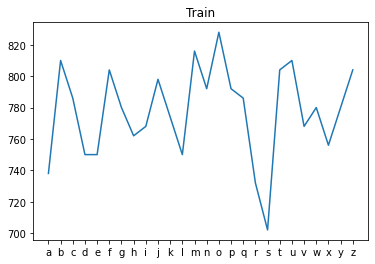

         Images Label
0    l_2353.png     l
1      z_21.png     z
2    m_2426.png     m
3    s_3172.png     s
4    q_2895.png     q
..          ...   ...
411   a_860.png     a
412    y_19.png     y
413  r_3050.png     r
414    g_13.png     g
415  z_4119.png     z

[416 rows x 2 columns]


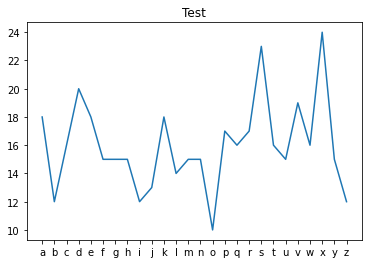

        Images Label
0   e_1382.png     e
1   e_1456.png     e
2   e_1362.png     e
3     e_22.png     e
4      e_6.png     e
..         ...   ...
16    r_15.png     r
17  r_3113.png     r
18  r_3081.png     r
19  r_3070.png     r
20  r_3010.png     r

[374 rows x 2 columns]


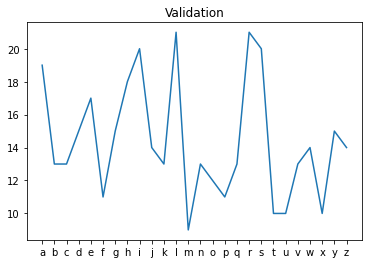

In [ ]:
# Plotting Graphs
train_df = get_dataframe(train_dir_path)
train_var = train_df.groupby('Label').count()
plt.plot(labels,train_var.Images.tolist())
plt.title("Train")
plt.show()


test_df = get_dataframe(test_dir_path)
test_var = test_df.groupby('Label').count()
plt.plot(labels,test_var.Images.tolist())
plt.title("Test")
plt.show()


validation_df = get_dataframe(validation_dir_path)
val_var = validation_df.groupby('Label').count()
plt.plot(labels,val_var.Images.tolist())
plt.title("Validation")
plt.show()



# Build Model

---
Now build the model as per the best learning rate and dropout probability value determined earlier. Summarize and plot the model architecture.

---

**2 Points**

---




Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               819712    
_________________________________________________________________
dense_41 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_42 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 26)                13338     
Total params: 1,358,362
Trainable params: 1,358,362
Non-trainable params: 0
___________________________________________

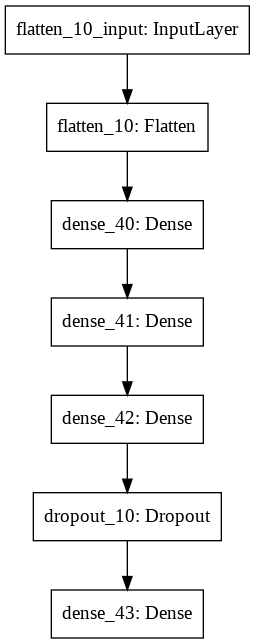

In [ ]:
# Insert your code here to build the model as per the best learning rate and dropout probability values determined earlier
model = build_model(dropout_probability=best_prob, LR=best_lr)

# Insert your code here to print the model summary
print(model.summary())

#Insert your code to plot the model architecture
tf.keras.utils.plot_model(model)


# Training the Model

---
Train the model built with best hyperparameter settings. Generate a **Plot** of Epochs Vs. training and validation accuracy. Also generate a similar plot for training and validation loss. Discuss your **inferences** from the plot.


---

**7 Points**


---



Epoch 1/40
632/632 [==============================] - 14s 22ms/step - loss: 3.2201 - categorical_accuracy: 0.1050 - val_loss: 2.8731 - val_categorical_accuracy: 0.2219
Epoch 2/40
632/632 [==============================] - 13s 21ms/step - loss: 2.7304 - categorical_accuracy: 0.2693 - val_loss: 2.6445 - val_categorical_accuracy: 0.2701
Epoch 3/40
632/632 [==============================] - 14s 21ms/step - loss: 2.4303 - categorical_accuracy: 0.3646 - val_loss: 2.4390 - val_categorical_accuracy: 0.3289
Epoch 4/40
632/632 [==============================] - 13s 21ms/step - loss: 2.1842 - categorical_accuracy: 0.4308 - val_loss: 2.2227 - val_categorical_accuracy: 0.3984
Epoch 5/40
632/632 [==============================] - 13s 21ms/step - loss: 1.9807 - categorical_accuracy: 0.4791 - val_loss: 2.0679 - val_categorical_accuracy: 0.4171
Epoch 6/40
632/632 [==============================] - 13s 21ms/step - loss: 1.8513 - categorical_accuracy: 0.5055 - val_loss: 2.0226 - val_categorical_accuracy:

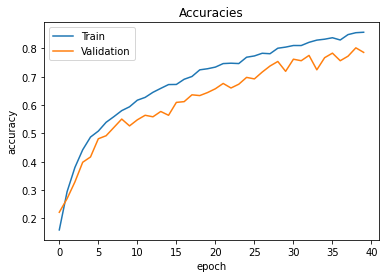

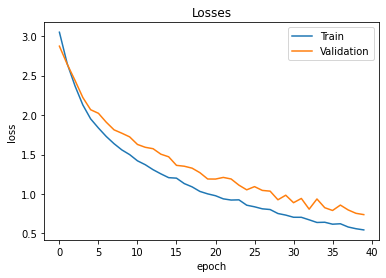

In [ ]:
# Insert your code here to train the model with best hyperparameter settings using training set and validate using the validation set (1 Point)
trained_model = model.fit(train_batch, epochs=num_epochs, validation_data= validation_batch, batch_size=best_batch_size)

# Insert your code here to obtain the lists: epochs, training accuracy, validation accuracy, training loss, validation loss (2 Points)

history = trained_model.history
req_list = list()
req_list.append(history['categorical_accuracy'])
req_list.append(history['val_categorical_accuracy'])
req_list.append(history['loss'])
req_list.append(history['val_loss'])


# Insert your code here to plot Epochs Vs. training and validation accuracy (2 Points)
plt.plot(req_list[0])
plt.plot(req_list[1])
plt.title('Accuracies')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'])
plt.show()


# Insert your code here to plot Epochs Vs. training and validation loss (2 Points)
plt.plot(req_list[2])
plt.plot(req_list[3])
plt.title('Losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'])
plt.show()



# Prediction

---
Evaluate performance of model on the test sets.




---
**2 Points**

---





In [ ]:
# Insert your code here to get the model's performance with test set

result = model.evaluate(test_batch)
result


13/13 [==============================] - 0s 14ms/step - loss: 0.7112 - categorical_accuracy: 0.7933


[0.7112102508544922, 0.7932692170143127]

# Observations

---
Write your observations from this experiment. Also, what would be your suggestions for increasing the performance of the model ?




---
**5 Points**

---


This experiment gave a very good insight of various functions defined in tensorflow to use for training neural network models. We also learnt to use different parameters as required to make better model.
- Observations
1. We should determine best parameters as of best learning rate, best dropout probability and best batch size before final training of model. As it reduces runtime and also increses accuracy of the model.
2. Validation set is very important as it is used to check after every epoch whether we are training the model effectively or not.

- To improve the performance of the model:-
1. Larger dataset with diversity within it can be used.
2. While training, we can use transformed images (rgb or grayscale or skewed images)
3. We can try for differnt values of learning rates, batch sizes and dropout probabilities.
4. We can increase the number of epochs while training. However, it leads to increased runtime. Hence, callout functions can be used to train for optimum number of epochs.